# Decision Tree

## Use Decision Tree to classify the Iris dataset
- dataset: 'Iris.csv'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Iris.csv')

# 1. Data Exploration

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
labels = dataset['Species'].unique()
print(labels)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


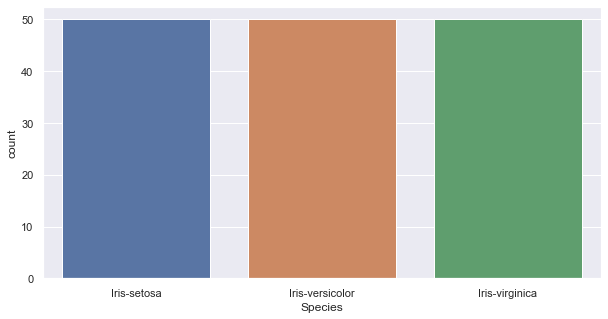

In [6]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Species", data=dataset)
plt.show()

## 1.1. Continous features data range

In [7]:
# Range of features
def print_data_range(data, labels, features, isreturn=False):
    return_range = []
    for feature in features:
        data_range = []
        for label in labels:
            data_range.append([label, data[data['Species'] == label][feature].min(), data[data['Species'] == label][feature].max()])
        res = pd.DataFrame(data_range, columns=['Species', 'min', 'max'])
        if not isreturn:
            print('==========================================')
            print(feature)
            print('-'*len(feature))
            print(res)
            print('==========================================')
        if isreturn:
            return_range.append(res.drop('Species', axis=1))
    if isreturn:
        return return_range, features
        
print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns))
data_range, data_features = print_data_range(dataset, labels, list(dataset.drop(['Id', 'Species'], axis=1).columns), True)

SepalLengthCm
-------------
           Species  min  max
0      Iris-setosa  4.3  5.8
1  Iris-versicolor  4.9  7.0
2   Iris-virginica  4.9  7.9
SepalWidthCm
------------
           Species  min  max
0      Iris-setosa  2.3  4.4
1  Iris-versicolor  2.0  3.4
2   Iris-virginica  2.2  3.8
PetalLengthCm
-------------
           Species  min  max
0      Iris-setosa  1.0  1.9
1  Iris-versicolor  3.0  5.1
2   Iris-virginica  4.5  6.9
PetalWidthCm
------------
           Species  min  max
0      Iris-setosa  0.1  0.6
1  Iris-versicolor  1.0  1.8
2   Iris-virginica  1.4  2.5


## 1.2. Visualization

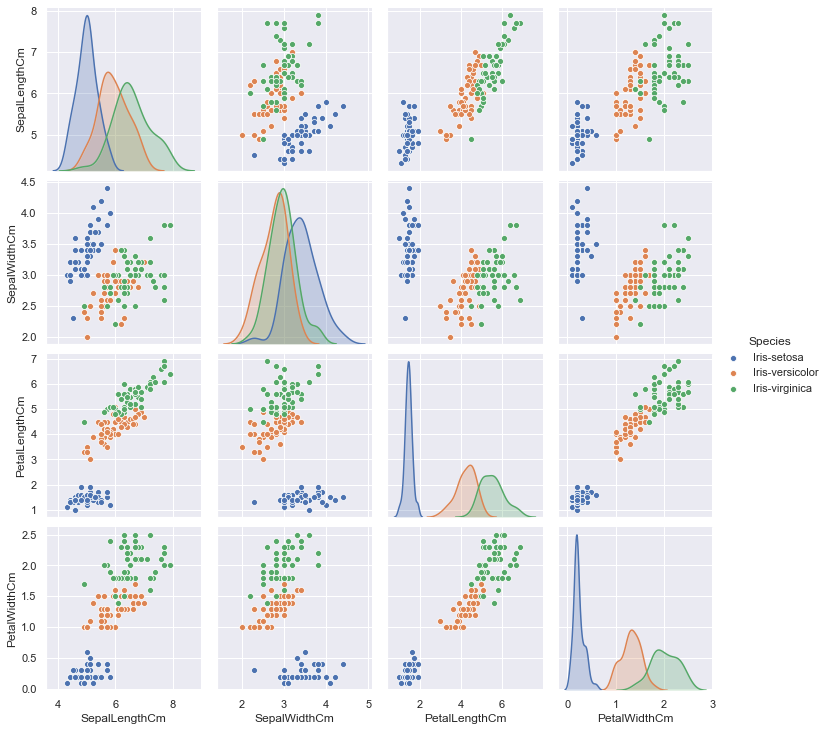

In [8]:
sns.pairplot(dataset.drop('Id', axis=1), hue = 'Species', kind='scatter')

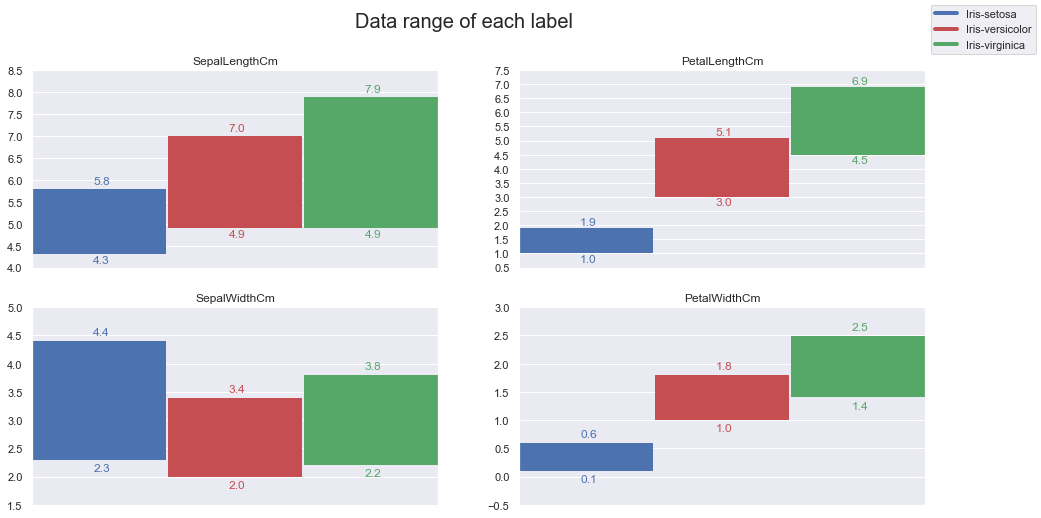

In [9]:
from matplotlib.lines import Line2D

colors = ['b', 'r', 'g']
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for idx in range(3):
    m0 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[0]['min'][idx], data_range[0]['max'][idx], 0.01))
    z0 = np.zeros((m0[0].shape))
    m1 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[1]['min'][idx], data_range[1]['max'][idx], 0.01))
    z1 = np.zeros((m1[0].shape))
    m2 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[2]['min'][idx], data_range[2]['max'][idx], 0.01))
    z2 = np.zeros((m2[0].shape))
    m3 = np.meshgrid(np.arange(idx, idx+1, 0.01), np.arange(data_range[3]['min'][idx], data_range[3]['max'][idx], 0.01))
    z3 = np.zeros((m3[0].shape))
    
    ax[0, 0].contourf(m0[0], m0[1], z0, colors=colors[idx])
    ax[0, 0].annotate(data_range[0]['min'][idx], (idx+0.45, data_range[0]['min'][idx]-0.2), color=colors[idx])
    ax[0, 0].annotate(data_range[0]['max'][idx], (idx+0.45, data_range[0]['max'][idx]+0.1), color=colors[idx])
    ax[1, 0].contourf(m1[0], m1[1], z1, colors=colors[idx])
    ax[1, 0].annotate(data_range[1]['min'][idx], (idx+0.45, data_range[1]['min'][idx]-0.2), color=colors[idx])
    ax[1, 0].annotate(data_range[1]['max'][idx], (idx+0.45, data_range[1]['max'][idx]+0.1), color=colors[idx])
    ax[0, 1].contourf(m2[0], m2[1], z2, colors=colors[idx])
    ax[0, 1].annotate(data_range[2]['min'][idx], (idx+0.45, data_range[2]['min'][idx]-0.3), color=colors[idx])
    ax[0, 1].annotate(data_range[2]['max'][idx], (idx+0.45, data_range[2]['max'][idx]+0.1), color=colors[idx])
    ax[1, 1].contourf(m3[0], m3[1], z3, colors=colors[idx])
    ax[1, 1].annotate(data_range[3]['min'][idx], (idx+0.45, data_range[3]['min'][idx]-0.2), color=colors[idx])
    ax[1, 1].annotate(data_range[3]['max'][idx], (idx+0.45, data_range[3]['max'][idx]+0.1), color=colors[idx])

ax[0, 0].set_title(data_features[0])
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks(np.arange(4,8.6,0.5))
ax[1, 0].set_title(data_features[1])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks(np.arange(1.5,5.1,0.5))
ax[0, 1].set_title(data_features[2])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks(np.arange(0.5,7.6,0.5))
ax[1, 1].set_title(data_features[3])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks(np.arange(-0.5,3.1,0.5))

fig.suptitle('Data range of each label', fontsize=20)
fig.legend(custom_lines, labels, loc='upper right')

# 2. Data Processing

## 2.1. Without grouping continous data

In [10]:
# Dividing dataset into features and encoded labels
X_raw = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species'].apply(lambda x: list(labels).index(x))

In [11]:
X_raw

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## 2.2. With grouping continous data

In [13]:
X = X_raw.copy()

In [14]:
pd.options.mode.chained_assignment = None  # default='warn'

# Grouping SepalLengthCm
X.loc[(X[data_features[0]] >= data_range[0]['min'][0]) & (X[data_features[0]] < data_range[0]['min'][1]), data_features[0]] = 0    # min0 -> min1
X.loc[(X[data_features[0]] >= data_range[0]['min'][1]) & (X[data_features[0]] <= data_range[0]['max'][0]), data_features[0]] = 1   # min1 -> max0
X.loc[(X[data_features[0]] > data_range[0]['max'][0]) & (X[data_features[0]] <= data_range[0]['max'][1]), data_features[0]] = 2    # max0 -> max1
X.loc[(X[data_features[0]] > data_range[0]['max'][1]) & (X[data_features[0]] <= data_range[0]['max'][2]), data_features[0]] = 3    # max1 -> max2
X[data_features[0]] = X[data_features[0]].astype('int')

# Grouping SepalWidthCm
X.loc[(X[data_features[1]] >= data_range[1]['min'][1]) & (X[data_features[1]] < data_range[1]['min'][2]), data_features[1]] = 0    # min1 -> min2
X.loc[(X[data_features[1]] >= data_range[1]['min'][2]) & (X[data_features[1]] < data_range[1]['min'][0]), data_features[1]] = 1    # min2 -> min0
X.loc[(X[data_features[1]] >= data_range[1]['min'][0]) & (X[data_features[1]] <= data_range[1]['max'][1]), data_features[1]] = 2   # min0 -> max1
X.loc[(X[data_features[1]] > data_range[1]['max'][1]) & (X[data_features[1]] <= data_range[1]['max'][2]), data_features[1]] = 3    # max1 -> max2
X.loc[(X[data_features[1]] > data_range[1]['max'][2]) & (X[data_features[1]] <= data_range[1]['max'][0]), data_features[1]] = 4    # max2 -> max0
X[data_features[1]] = X[data_features[1]].astype('int')

# Grouping PetalLengthCm
X.loc[(X[data_features[2]] >= data_range[2]['min'][0]) & (X[data_features[2]] <= data_range[2]['max'][0]), data_features[2]] = 0   # min0 -> max0
X.loc[(X[data_features[2]] >= data_range[2]['min'][1]) & (X[data_features[2]] < data_range[2]['min'][2]), data_features[2]] = 1    # min1 -> min2
X.loc[(X[data_features[2]] >= data_range[2]['min'][2]) & (X[data_features[2]] <= data_range[2]['max'][1]), data_features[2]] = 2   # min2 -> max1
X.loc[(X[data_features[2]] > data_range[2]['max'][1]) & (X[data_features[2]] <= data_range[2]['max'][2]), data_features[2]] = 3    # max1 -> max2
X[data_features[2]] = X[data_features[2]].astype('int')

# Grouping PetalWidthCm
X.loc[(X[data_features[3]] >= data_range[3]['min'][0]) & (X[data_features[3]] <= data_range[3]['min'][0]), data_features[3]] = 0   # min0 -> max0
X.loc[(X[data_features[3]] >= data_range[3]['min'][1]) & (X[data_features[3]] < data_range[3]['min'][2]), data_features[3]] = 1    # min1 -> min2
X.loc[(X[data_features[3]] >= data_range[3]['min'][2]) & (X[data_features[3]] <= data_range[3]['max'][1]), data_features[3]] = 2   # min2 -> max1
X.loc[(X[data_features[3]] > data_range[3]['max'][1]) & (X[data_features[3]] <= data_range[3]['max'][2]), data_features[3]] = 3    # max1 -> max2
X[data_features[3]] = X[data_features[3]].astype('int')

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,3,0,0
1,1,2,0,0
2,0,2,0,0
3,0,2,0,0
4,1,3,0,0
...,...,...,...,...
145,2,2,3,3
146,2,2,2,3
147,2,2,3,3
148,2,2,3,3


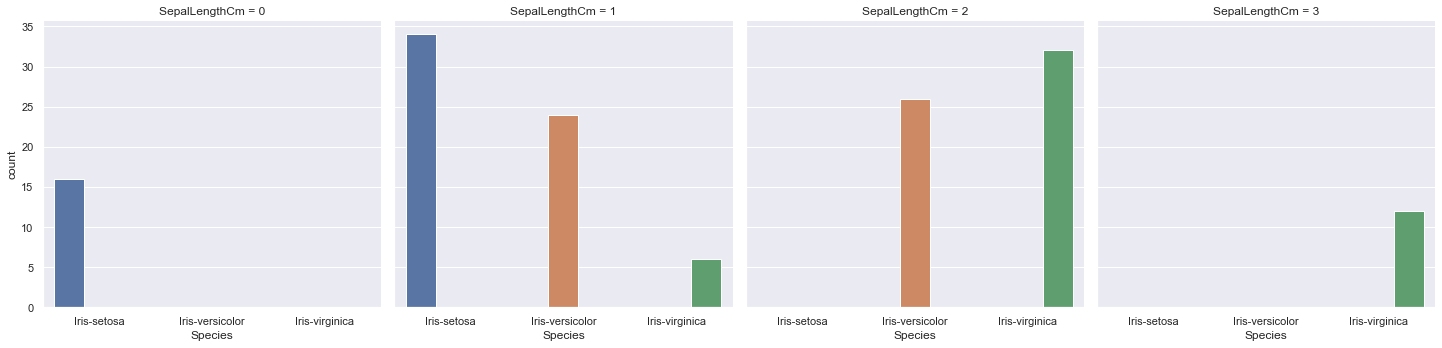

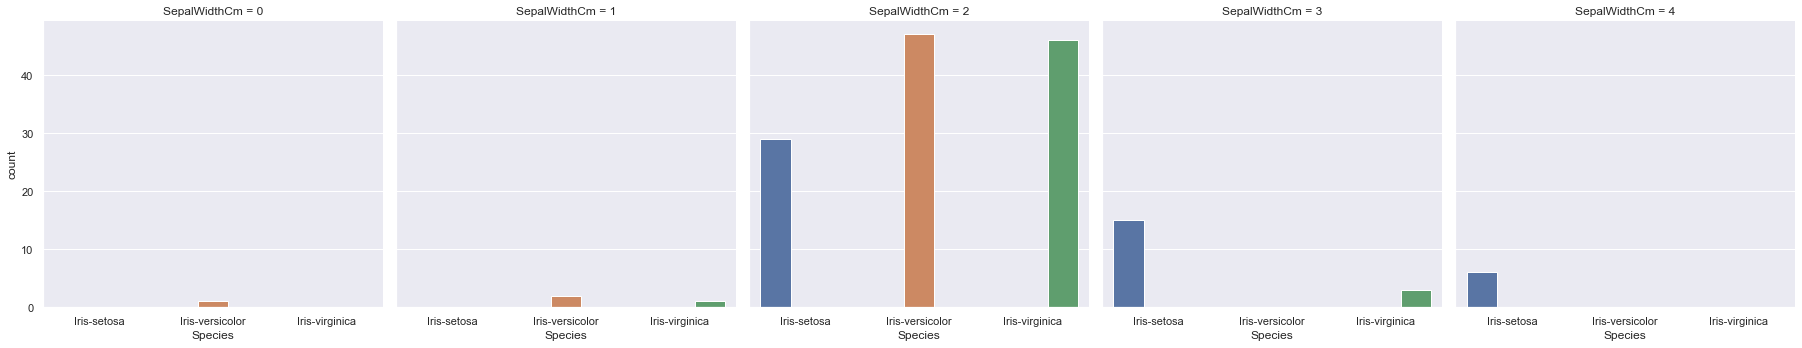

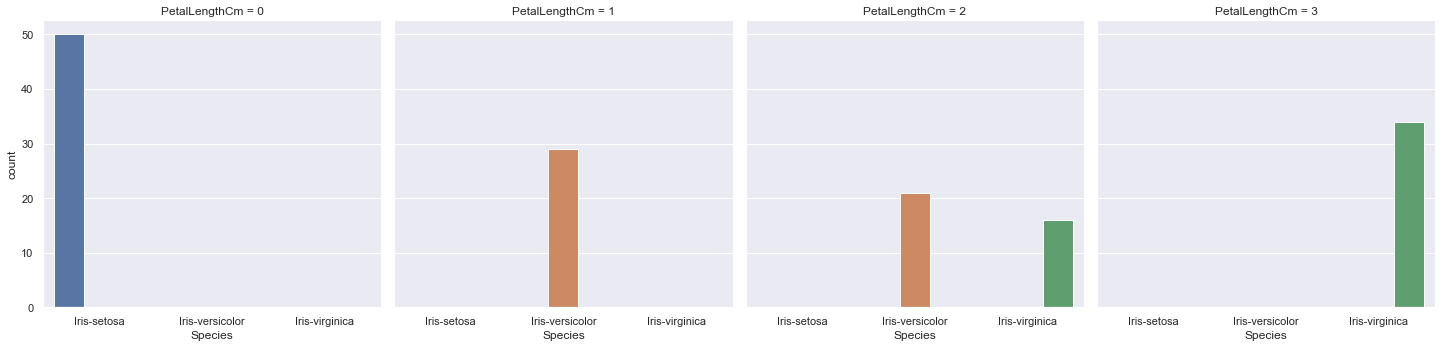

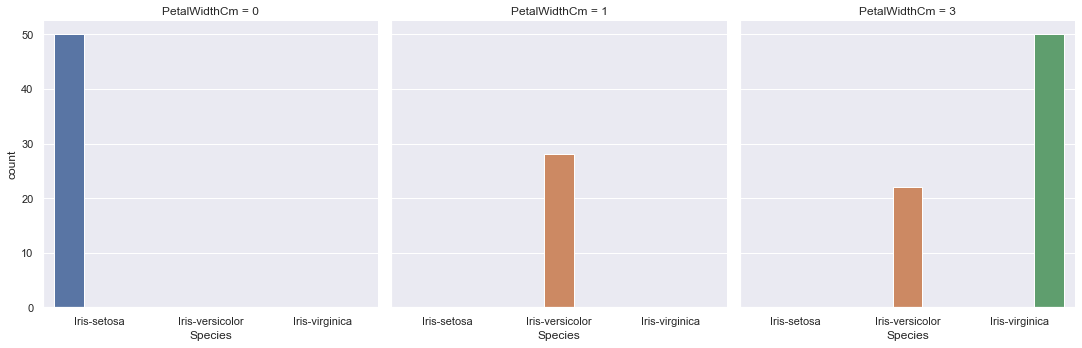

In [15]:
# Visualization
dataplot = X.copy()
dataplot['Species'] = dataset['Species'].copy()
sns.catplot(x="Species", hue="Species", col="SepalLengthCm", data=dataplot, kind="count")
sns.catplot(x="Species", hue="Species", col="SepalWidthCm", data=dataplot, kind="count")
sns.catplot(x="Species", hue="Species", col="PetalLengthCm", data=dataplot, kind="count")
sns.catplot(x="Species", hue="Species", col="PetalWidthCm", data=dataplot, kind="count")

## 2.2. Splitting data

In [16]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_raw_train.shape, X_raw_test.shape)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120, 4) (30, 4)
(120,) (30,)


In [17]:
X_raw_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
105,7.6,3.0,6.6,2.1
130,7.4,2.8,6.1,1.9
2,4.7,3.2,1.3,0.2
21,5.1,3.7,1.5,0.4


In [18]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
79,1,2,1,1
8,0,2,0,0
11,0,2,0,0
133,2,2,2,3
146,2,2,2,3


# 3. DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import graphviz

## Creating class

In [20]:
class DecisionTree():
    def __init__(self, depth, criterion, random_state=0):
        self.depth = depth
        self.criterion = criterion
        self.decision_tree = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=random_state)
        self.y_pred = None
        
    # Fitting the model
    def fit(self, X_train, y_train):
        self.decision_tree.fit(np.array(X_train), np.array(y_train))
        print(self.decision_tree)
        
    # Predicting on the test set
    def predict(self, X_test):
        self.y_pred = self.decision_tree.predict(np.array(X_test))
        print(self.y_pred)
    
    # Evaluating the model
    def evaluate(self, y_test):
        # Confusion matrix
        cm = confusion_matrix(y_test, self.y_pred)
        
        # Using accuracy_score
        accuracy = accuracy_score(y_test, self.y_pred)*100
        
        print('Confusion matrix: ')
        print(cm)
        print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
        
    # Visualizing Decision tree graph
    def visualize_decision_tree(self):
        dot_data = export_graphviz(self.decision_tree, out_file=None)
        graph = graphviz.Source(dot_data)
        return graph
        
    # Choosing best depth by calculating the average cross-valiation accuracy
    @staticmethod
    def choose_best_depth(max_depth, X, y, criterion, random_state=0):
        # Max tree depth
        max_depth_range = list(range(1, max_depth + 1))

        # Average Cross-validation accuracy list
        cv_acc = list()

        # Looping depth to calculate the average cross-valiation accuracy of the decision tree on each depth
        for depth in max_depth_range:
            cv_acc.append(cross_val_score(DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=random_state), np.array(X), np.array(y), cv=10, scoring='accuracy', n_jobs=-1).mean())

        # Showing the results
        df = pd.DataFrame({"Max Depth": max_depth_range, "Average Cross-validdation Accuracy": cv_acc})
        print(df.to_string(index=False))

        # Choosing the best depth
        best_depth_idx = np.array(cv_acc).argmax()
        best_depth = max_depth_range[best_depth_idx]
        print('Best depth: ' + str(best_depth))
        
        return (max_depth_range, cv_acc, best_depth)
    
    # Plotting cross-validation accuracy by depth
    @staticmethod
    def plot_cv_acc(max_depth_range, cv_acc, best_depth):
        # Generate plot
        plt.figure(figsize=(10,5))
        plt.title('Decision tree accuracy by depth')
        plt.plot(max_depth_range, cv_acc, label='Cross-validation', color='g')
        plt.legend()
        plt.xlabel('Depth')
        plt.ylabel('Accuracy')
        plt.xticks(max_depth_range)
        plt.plot(best_depth, np.array(cv_acc).max(), marker='o', color='g')
        plt.annotate(str(format(np.array(cv_acc).max(), '.3f')) + '...', xy=(best_depth - 0.08, np.array(cv_acc).max() - 0.01), color='g')
        plt.show()

## 3.1. Without grouping continous data

### 3.1.1. Using entropy

#### 3.1.1.1. Choosing best depth

In [21]:
# Choosing best depth
raw_entr_max_depth_range, raw_entr_cv_acc, raw_entr_best_depth = DecisionTree.choose_best_depth(len(X_raw_test.columns), X_raw_train, y_train, 'entropy')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.483333
         2                            0.458333
         3                            0.466667
         4                            0.475000
Best depth: 1


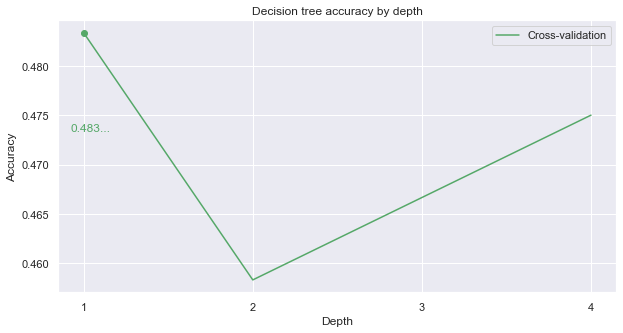

In [22]:
# Plotting
DecisionTree.plot_cv_acc(raw_entr_max_depth_range, raw_entr_cv_acc, raw_entr_best_depth)

#### 3.1.1.2. Fitting the model

In [23]:
# Decision tree with best depth
raw_entr_decision_tree = DecisionTree(raw_entr_best_depth, 'entropy')

# Fitting the model
raw_entr_decision_tree.fit(np.array(X_raw_train), np.array(y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)


#### 3.1.1.3. Prediction

In [24]:
# Predicting on the test set
raw_entr_decision_tree.predict(X_raw_test)

[0 2 0 2 2 2 0 2 2 2 0 2 0 0 0 2 0 2 2 0 0 2 2 0 0 0 2 2 2 2]


#### 3.1.1.4. Evaluating

In [25]:
# Evaluating the model
raw_entr_decision_tree.evaluate(y_test)

Confusion matrix: 
[[3 0 4]
 [7 0 7]
 [3 0 6]]
Accuracy of our model is equal 30.0 %.


#### 3.1.1.5. Visualizing Decision Tree

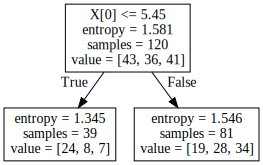

In [26]:
# Visualizing
graph = raw_entr_decision_tree.visualize_decision_tree()
graph

### 3.1.2. Using gini

#### 3.1.2.1. Choosing best depth

In [27]:
# Choosing best depth
raw_gini_max_depth_range, raw_gini_cv_acc, raw_gini_best_depth = DecisionTree.choose_best_depth(len(X_raw_test.columns), X_raw_train, y_train, 'gini')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.483333
         2                            0.458333
         3                            0.475000
         4                            0.441667
Best depth: 1


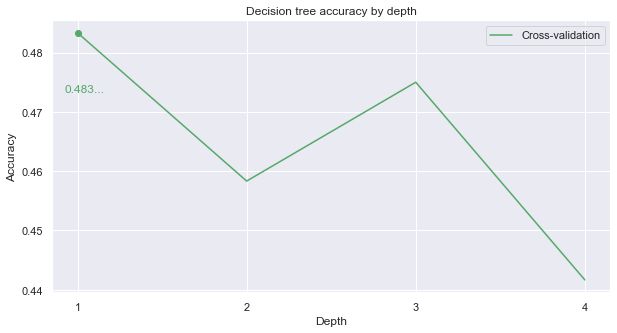

In [28]:
# Plotting
DecisionTree.plot_cv_acc(raw_gini_max_depth_range, raw_gini_cv_acc, raw_gini_best_depth)

#### 3.1.2.2. Fitting the model

In [29]:
# Decision tree with best depth
raw_gini_decision_tree = DecisionTree(raw_gini_best_depth, 'gini')

# Fitting the model
raw_gini_decision_tree.fit(np.array(X_raw_train), np.array(y_train))

DecisionTreeClassifier(max_depth=1, random_state=0)


#### 3.1.2.3. Prediction

In [30]:
# Predicting on the test set
raw_gini_decision_tree.predict(X_raw_test)

[0 2 0 2 2 2 0 2 2 2 0 2 0 0 0 2 0 2 2 0 0 2 2 0 0 0 2 2 2 2]


#### 3.1.2.4. Evaluating

In [31]:
# Evaluating the model
raw_gini_decision_tree.evaluate(y_test)

Confusion matrix: 
[[3 0 4]
 [7 0 7]
 [3 0 6]]
Accuracy of our model is equal 30.0 %.


#### 3.1.2.5. Visualizing Decision Tree

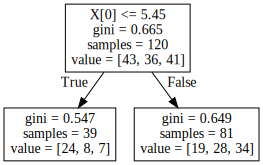

In [32]:
# Visualizing
graph = raw_gini_decision_tree.visualize_decision_tree()
graph

## 3.2. With grouping continous data

### 3.2.1. Using entropy

#### 3.2.1.1. Choosing best depth

In [33]:
# Choosing best depth
entr_max_depth_range, entr_cv_acc, entr_best_depth = DecisionTree.choose_best_depth(len(X_test.columns), X_train, y_train, 'entropy')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.700000
         2                            0.875000
         3                            0.841667
         4                            0.833333
Best depth: 2


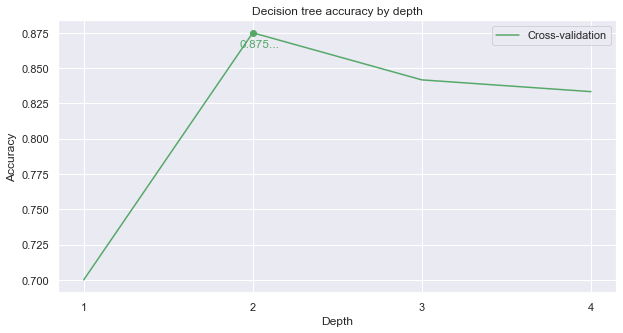

In [34]:
# Plotting
DecisionTree.plot_cv_acc(entr_max_depth_range, entr_cv_acc, entr_best_depth)

#### 3.2.1.2. Fitting the model

In [35]:
# Decision tree with best depth
entr_decision_tree = DecisionTree(entr_best_depth, 'entropy')

# Fitting the model
entr_decision_tree.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


#### 3.2.1.3. Prediction

In [36]:
# Predicting on the test set
entr_decision_tree.predict(X_test)

[1 1 1 0 1 1 2 0 1 1 0 0 1 0 1 1 0 0 2 1 1 2 2 2 1 1 2 2 1 2]


#### 3.2.1.4. Evaluating

In [37]:
# Evaluating the model
entr_decision_tree.evaluate(y_test)

Confusion matrix: 
[[ 7  0  0]
 [ 0 14  0]
 [ 0  1  8]]
Accuracy of our model is equal 96.67 %.


#### 3.2.1.5. Visualizing Decision Tree

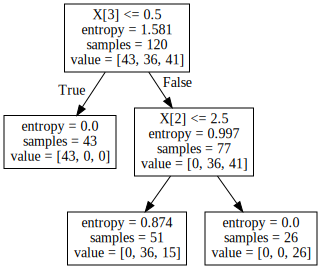

In [38]:
# Visualizing
graph = entr_decision_tree.visualize_decision_tree()
graph

### 3.2.2. Using gini

#### 3.2.2.1. Choosing best depth

In [39]:
# Choosing best depth
gini_max_depth_range, gini_cv_acc, gini_best_depth = DecisionTree.choose_best_depth(len(X_test.columns), X_train, y_train, 'gini')

 Max Depth  Average Cross-validdation Accuracy
         1                            0.700000
         2                            0.841667
         3                            0.841667
         4                            0.833333
Best depth: 2


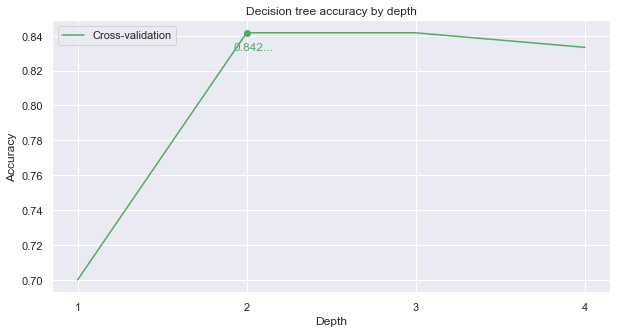

In [40]:
# Plotting
DecisionTree.plot_cv_acc(gini_max_depth_range, gini_cv_acc, gini_best_depth)

#### 3.2.2.2. Fitting the model

In [41]:
# Decision tree with best depth
gini_decision_tree = DecisionTree(gini_best_depth, 'gini')

# Fitting the model
gini_decision_tree.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(max_depth=2, random_state=0)


#### 3.2.2.3. Prediction

In [42]:
# Predicting on the test set
gini_decision_tree.predict(X_test)

[1 1 1 0 1 1 2 0 1 1 0 0 1 0 1 1 0 0 2 1 1 2 2 2 1 1 2 2 1 2]


#### 3.2.2.4. Evaluating

In [43]:
# Evaluating the model
gini_decision_tree.evaluate(y_test)

Confusion matrix: 
[[ 7  0  0]
 [ 0 14  0]
 [ 0  1  8]]
Accuracy of our model is equal 96.67 %.


#### 3.2.2.5. Visualizing Decision Tree

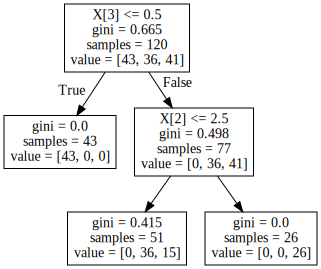

In [44]:
# Visualizing
graph = gini_decision_tree.visualize_decision_tree()
graph